<a href="https://colab.research.google.com/github/mhaletoki/MA22C025_2023_PL/blob/main/Assignments/Assignment_10/COVID_Geospatial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import urllib
import shutil
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url2= 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

In [3]:
data = pd.read_csv(url)
data.head()



,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
type(world)
world= world.rename(columns={'name': 'Country/Region'})


In [5]:
type(world.geometry)

geopandas.geoseries.GeoSeries

In [6]:
world.head()

,pop_est,continent,Country/Region,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Axes: >

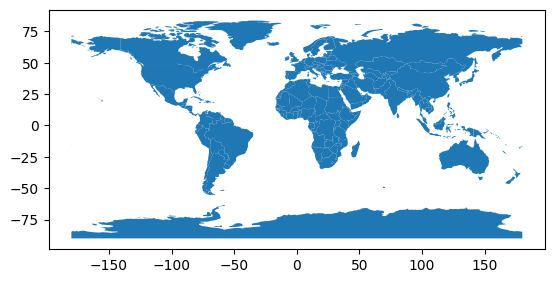

In [7]:
world.plot()

In [8]:
data2=pd.read_csv(url2)
data2.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


In [9]:
data2= data2.rename(columns={'iso3': 'iso_a3'})
columns_to_drop = ['UID', 'iso2', 'code3', 'FIPS', 'Admin2' ,'Combined_Key','Lat','Long_']
data2 = data2.drop(columns=[col for col in columns_to_drop if col in data2.columns])



In [10]:
data2.head()

,iso_a3,Province_State,Country_Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,USA,Alabama,US,0,0,0,0,0,0,0,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,USA,Alabama,US,0,0,0,0,0,0,0,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,USA,Alabama,US,0,0,0,0,0,0,0,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,USA,Alabama,US,0,0,0,0,0,0,0,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,USA,Alabama,US,0,0,0,0,0,0,0,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


In [11]:
warnings.filterwarnings("ignore", category=FutureWarning)

data2=data2.groupby('iso_a3').sum()
data2.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
iso_a3,,,,,,,,,,,,,,,,,,,,,
ASM,0,0,0,0,0,0,0,0,0,0,...,8320,8320,8320,8320,8320,8320,8320,8320,8320,8320
GUM,0,0,0,0,0,0,0,0,0,0,...,60989,60997,61001,61002,61002,61002,61002,61018,61019,61027
MNP,0,0,0,0,0,0,0,0,0,0,...,13631,13631,13631,13666,13666,13666,13666,13666,13666,13666
PRI,0,0,0,0,0,0,0,0,0,0,...,1098242,1098678,1099150,1099611,1099960,1100358,1100557,1100634,1101027,1101469
USA,1,1,2,2,5,5,5,6,6,8,...,102237507,102327472,102382876,102441311,102443109,102438849,102447202,102482477,102546941,102593407


In [12]:

data2= data2.rename(columns={'iso3': 'iso_a3'})


In [13]:
data2.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
iso_a3,,,,,,,,,,,,,,,,,,,,,
ASM,0,0,0,0,0,0,0,0,0,0,...,8320,8320,8320,8320,8320,8320,8320,8320,8320,8320
GUM,0,0,0,0,0,0,0,0,0,0,...,60989,60997,61001,61002,61002,61002,61002,61018,61019,61027
MNP,0,0,0,0,0,0,0,0,0,0,...,13631,13631,13631,13666,13666,13666,13666,13666,13666,13666
PRI,0,0,0,0,0,0,0,0,0,0,...,1098242,1098678,1099150,1099611,1099960,1100358,1100557,1100634,1101027,1101469
USA,1,1,2,2,5,5,5,6,6,8,...,102237507,102327472,102382876,102441311,102443109,102438849,102447202,102482477,102546941,102593407


In [14]:
geo = gpd.points_from_xy(data['Long'], data['Lat'])
gdata = gpd.GeoDataFrame(data, geometry=geo)
gdata.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,geometry
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209340,209358,209362,209369,209390,209406,209436,209451,209451,POINT (67.70995 33.93911)
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334408,334408,334427,334427,334427,334427,334427,334443,334457,POINT (20.16830 41.15330)
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271448,271463,271469,271469,271477,271477,271490,271494,271496,POINT (1.65960 28.03390)
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47875,47875,47875,47875,47875,47875,47875,47890,47890,POINT (1.52180 42.50630)
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105277,105277,105277,105277,105277,105277,105277,105288,105288,POINT (17.87390 -11.20270)


In [15]:
country_data_covid = gdata.groupby('Country/Region').sum()

In [16]:
len(country_data_covid)

201

In [17]:
country_data_covid.head()


,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [18]:
new_data = pd.merge(world,country_data_covid, on='Country/Region',how='outer')

In [19]:
new_data.head()

,pop_est,continent,Country/Region,iso_a3,gdp_md_est,geometry,Lat,Long,1/22/20,1/23/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,889953.0,Oceania,Fiji,FJI,5496.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",-17.713400,178.065000,0.0,0.0,...,68889.0,68889.0,68897.0,68897.0,68897.0,68897.0,68897.0,68897.0,68897.0,68898.0
1,58005463.0,Africa,Tanzania,TZA,63177.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",-6.369028,34.888822,0.0,0.0,...,42823.0,42846.0,42846.0,42846.0,42846.0,42846.0,42846.0,42846.0,42906.0,42906.0
2,603253.0,Africa,W. Sahara,ESH,907.0,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",708.855600,-1202.597900,0.0,2.0,...,4602806.0,4603795.0,4608456.0,4609042.0,4609458.0,4609751.0,4611428.0,4612219.0,4613054.0,4617095.0
4,328239523.0,North America,United States of America,USA,21433226.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
new_data_2= pd.merge(new_data,data2,on='iso_a3', how='left')


In [21]:
len(new_data_2)

226

In [22]:
new_data_2.head()

,pop_est,continent,Country/Region,iso_a3,gdp_md_est,geometry,Lat,Long,1/22/20_x,1/23/20_x,...,2/28/23_y,3/1/23_y,3/2/23_y,3/3/23_y,3/4/23_y,3/5/23_y,3/6/23_y,3/7/23_y,3/8/23_y,3/9/23_y
0,889953.0,Oceania,Fiji,FJI,5496.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",-17.713400,178.065000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",-6.369028,34.888822,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907.0,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",708.855600,-1202.597900,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,328239523.0,North America,United States of America,USA,21433226.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN,NaN,NaN,...,102237507.0,102327472.0,102382876.0,102441311.0,102443109.0,102438849.0,102447202.0,102482477.0,102546941.0,102593407.0


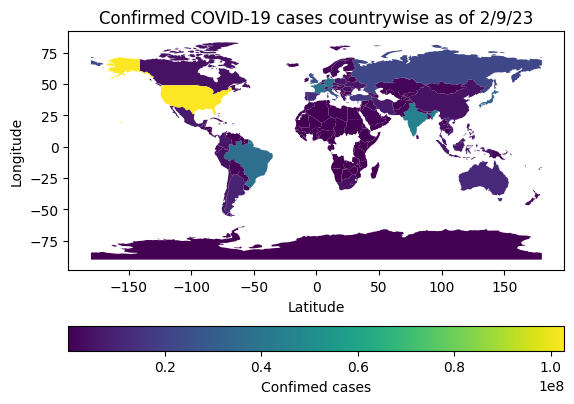

In [23]:
fig, ax = plt.subplots()
new_data_2.plot(ax=ax, column='2/9/23_x', legend=True, legend_kwds={'label': 'Confimed cases', 'orientation':'horizontal'})
new_data_2.plot(ax=ax, column='2/9/23_y')

ax.set_title('Confirmed COVID-19 cases countrywise as of 2/9/23')
ax.set_xlabel('Latitude'); ax.set_ylabel('Longitude');

In [25]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


In [26]:
def update(frame):
    date = f'2/{frame}/23_x'  # Modify the date format as needed
    ax.clear()
    new_data_2.plot(ax=ax, column=date, legend=True, legend_kwds={'label': 'Confirmed cases', 'orientation': 'horizontal'})
    ax.set_title(f'Confirmed COVID-19 cases as of 2/{frame}/23')
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')


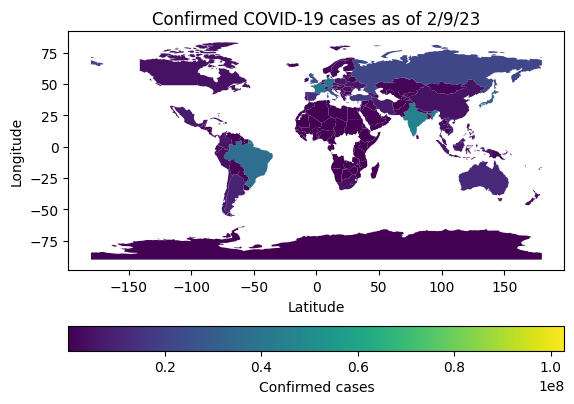

In [27]:
fig, ax = plt.subplots()
ani = FuncAnimation(fig, update, frames=range(9, 24))  # Adjust the range as needed


In [32]:
# To display the animation


#not done

